# Logistic Regression을 사용하여 고객별 광고 반응율을 예측

## Logistic Regression은 데이터가 특정 카테고리에 속할지를 0과 1사이의 연속적인 확률로 예측하는 회귀 알고리즘 중 하나입니다

- parametric = > Linear regression, Logistic regression, CNN, RNN 등 
 모델이 학습해야 하는 것이 명확히 정해져 있기 때문에 속도가 빠르고, 모델을
이해하기 쉽다
- 모델의 파라미터 수가 정해져 있다 


In [3]:
#데이터 처리 모듈
import pandas as pd
import numpy as np

#시각화 담당하는 모듈
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('advertising.csv')

In [5]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


In [6]:
data.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
5,59.99,23.0,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,5/19/2016 14:30,0
6,88.91,NaN,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,1/28/2016 20:59,0
7,66.00,48.0,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,3/7/2016 1:40,1
8,74.53,30.0,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,4/18/2016 9:33,0
9,69.88,20.0,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,7/11/2016 1:42,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       916 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [8]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,916.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.128821,55000.000080,180.000100,0.481000,0.50000
std,15.853615,9.018548,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


C:\Users\MyCom\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Area Income', ylabel='Density'>

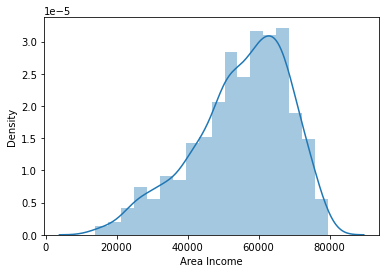

In [9]:
sns.distplot(data['Area Income'])

C:\Users\MyCom\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

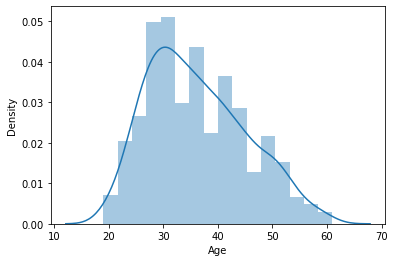

In [10]:
sns.distplot(data['Age'])

In [11]:
data['Country'].nunique()

237

In [12]:
data['City'].nunique()

969

In [13]:
data['Ad Topic Line'].nunique()  

1000

#nunique 변환을 사용하려고 시도했지만 전체 그룹의 고유 한 값을 제공합니다



In [17]:
data.sum()

Daily Time Spent on Site                                              65000.2
Age                                                                     33094
Area Income                                                           5.5e+07
Daily Internet Usage                                                   180000
Ad Topic Line               Cloned 5thgeneration orchestrationMonitored na...
City                        WrightburghWest JodiDavidtonWest TerrifurtSout...
Male                                                                      481
Country                     TunisiaNauruSan MarinoItalyIcelandNorwayMyanma...
Timestamp                   3/27/2016 0:534/4/2016 1:393/13/2016 20:351/10...
Clicked on Ad                                                             500
dtype: object

In [22]:
len(data)

1000

In [21]:
#널값 찾는 방법 , false는 0으로 처리하고 true는 1으로 처리한다
data.isna().sum() / len(data)

Daily Time Spent on Site    0.000
Age                         0.084
Area Income                 0.000
Daily Internet Usage        0.000
Ad Topic Line               0.000
City                        0.000
Male                        0.000
Country                     0.000
Timestamp                   0.000
Clicked on Ad               0.000
dtype: float64

In [26]:
# 널값 제거 하는 법
#opna함수는 column내에 NaN값이 있으면 해당 내용은 필요없다 간주하고 삭제해버린다.

data.dropna(inplace=True)

In [27]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
5,59.99,23.0,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,5/19/2016 14:30,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


In [30]:
data.drop('Age', axis=1)

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
1,80.23,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
5,59.99,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,5/19/2016 14:30,0
...,...,...,...,...,...,...,...,...,...
995,72.97,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


In [32]:
data['Age'].mean()

36.12882096069869

In [38]:
round(data['Age'].mean())

36

In [33]:
data['Age'].median()

35.0

C:\Users\MyCom\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

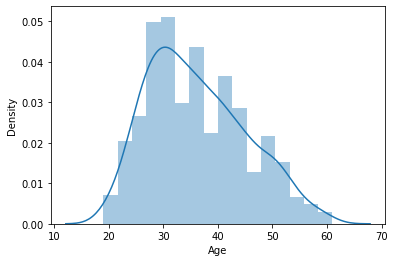

In [34]:
sns.distplot(data['Age'])

In [40]:
data = data.fillna(round(data['Age'].mean()))

In [41]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
5,59.99,23.0,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,5/19/2016 14:30,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


In [42]:
data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

#널값 제거 완료

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
5,59.99,23.0,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,5/19/2016 14:30,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/2016 21:49,1
996,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/2016 2:07,1
997,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/2016 17:24,1
998,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/2016 2:35,0


In [54]:
X = data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y = data['Clicked on Ad']

In [55]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
1,80.23,31.0,68441.85,193.77,1
2,69.47,26.0,59785.94,236.50,0
3,74.15,29.0,54806.18,245.89,1
4,68.37,35.0,73889.99,225.58,0
5,59.99,23.0,59761.56,226.74,1
...,...,...,...,...,...
995,72.97,30.0,71384.57,208.58,1
996,51.30,45.0,67782.17,134.42,1
997,51.63,51.0,42415.72,120.37,1
998,55.55,19.0,41920.79,187.95,0


In [57]:
y

1      0
2      0
3      0
4      0
5      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 916, dtype: int64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 100)

In [61]:
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
582,40.04,27.0,48098.86,161.58,0
258,83.47,39.0,64447.77,226.11,0
428,60.53,29.0,56759.48,123.28,0
689,77.50,28.0,60997.84,225.34,1
926,72.55,22.0,58953.01,202.34,0
...,...,...,...,...,...
936,63.18,45.0,39211.49,107.92,0
952,62.79,36.0,18368.57,231.87,1
910,42.84,52.0,27073.27,182.20,1
863,76.64,39.0,66217.31,241.50,1


In [62]:
X_test

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
191,60.23,35.0,43313.73,106.86,0
167,86.06,31.0,53767.12,219.72,1
845,44.16,42.0,61690.93,133.42,1
461,32.99,45.0,49282.87,177.46,0
766,42.32,29.0,63891.29,187.09,1
...,...,...,...,...,...
248,42.44,56.0,43450.11,168.27,0
550,75.80,36.0,71222.40,224.90,0
507,49.99,41.0,61068.26,121.07,0
186,46.31,57.0,44248.52,153.98,1


In [63]:
from sklearn.linear_model import LogisticRegression

In [66]:
model = LogisticRegression()

In [67]:
model.fit(X_train, y_train)

LogisticRegression()

In [68]:
model.coef_

array([[-1.73309246e-01,  1.68018247e-01, -1.26728970e-04,
        -6.28304209e-02,  5.39140591e-01]])

In [74]:
pred = model.predict(X_test)

In [71]:
y_test

191    1
167    0
845    1
461    1
766    1
      ..
248    1
550    0
507    1
186    1
355    0
Name: Clicked on Ad, Length: 184, dtype: int64

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix

분류결과표(Confusion Matrix)는 타겟의 원래 클래스와 모형이 예측한 클래스가 일치하는지는 갯수로 센 결과를 표나 나타낸 것이다. 정답 클래스는 행(row)으로 예측한 클래스는 열(column)로 나타낸다.



In [76]:
accuracy_score(y_test,pred) #184데이터를 예측했는데 97프로 맞음

0.9782608695652174

In [80]:
confusion_matrix(y_test,pred)

array([[87,  1],
       [ 3, 93]], dtype=int64)